In [1]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [2]:
# 遞迴尋找所有 csv
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

root_dir = 'instance/imputed_data_on_system'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'PMDI_imputed_rolling_median_on_system': 'instance/imputed_data_on_system/rolling/PMDI_imputed_rolling_median_on_system.csv', 'PMDI_imputed_rolling_rolling_on_system': 'instance/imputed_data_on_system/rolling/PMDI_imputed_rolling_rolling_on_system.csv', 'PMDI_imputed_rolling_mean_on_system': 'instance/imputed_data_on_system/rolling/PMDI_imputed_rolling_mean_on_system.csv', 'PMDI_imputed_rolling_knn_on_system': 'instance/imputed_data_on_system/rolling/PMDI_imputed_rolling_knn_on_system.csv', 'PMDI_imputed_linear_knn_on_system': 'instance/imputed_data_on_system/linear/PMDI_imputed_linear_knn_on_system.csv', 'PMDI_imputed_linear_mean_on_system': 'instance/imputed_data_on_system/linear/PMDI_imputed_linear_mean_on_system.csv', 'PMDI_imputed_linear_rolling_on_system': 'instance/imputed_data_on_system/linear/PMDI_imputed_linear_rolling_on_system.csv', 'PMDI_imputed_linear_median_on_system': 'instance/imputed_data_on_system/linear/PMDI_imputed_linear_median_on_system.csv', 'PMDI_imputed_ffill

===== 處理 PMDI_imputed_rolling_median_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.21s/it]


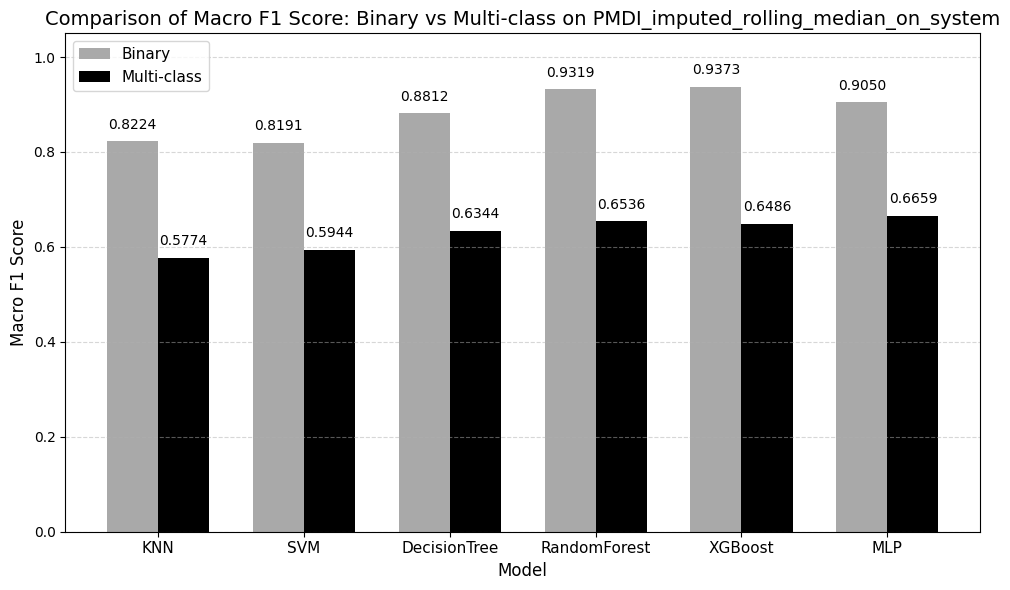

===== 處理 PMDI_imputed_rolling_rolling_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]


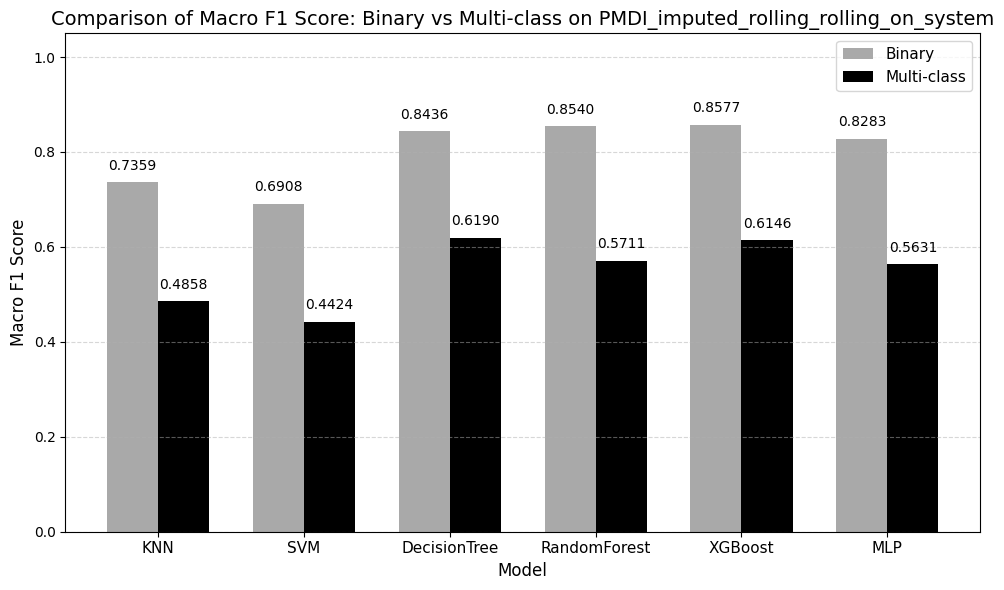

===== 處理 PMDI_imputed_rolling_mean_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]


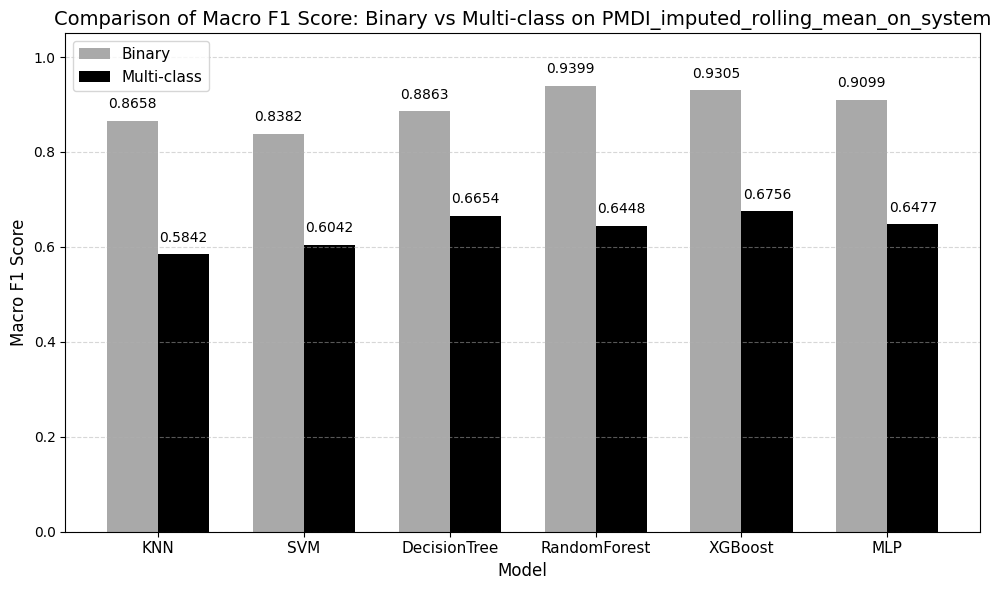

===== 處理 PMDI_imputed_rolling_knn_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]


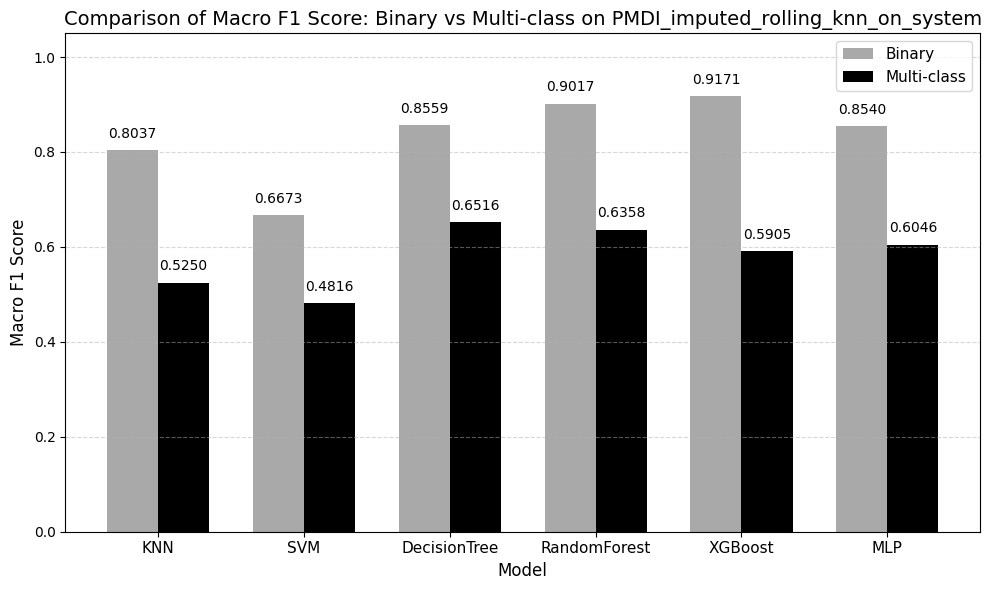

===== 處理 PMDI_imputed_linear_knn_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.10s/it]


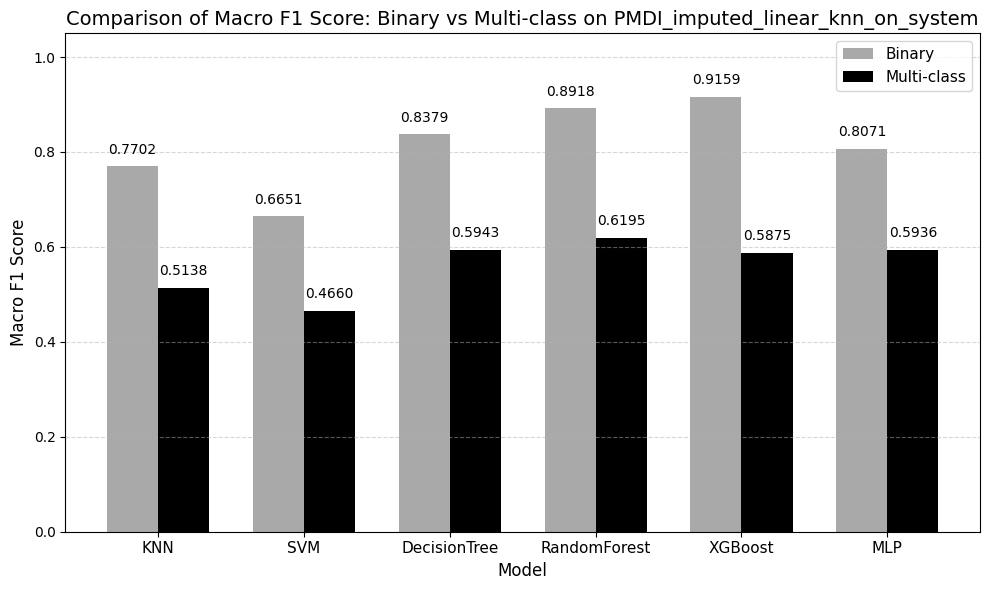

===== 處理 PMDI_imputed_linear_mean_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.33s/it]


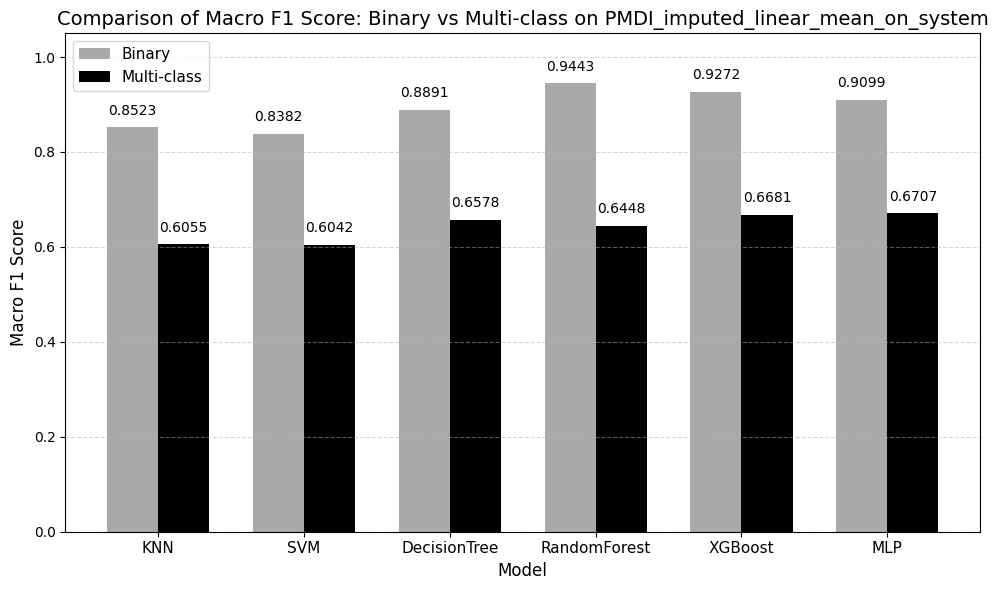

===== 處理 PMDI_imputed_linear_rolling_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.31s/it]


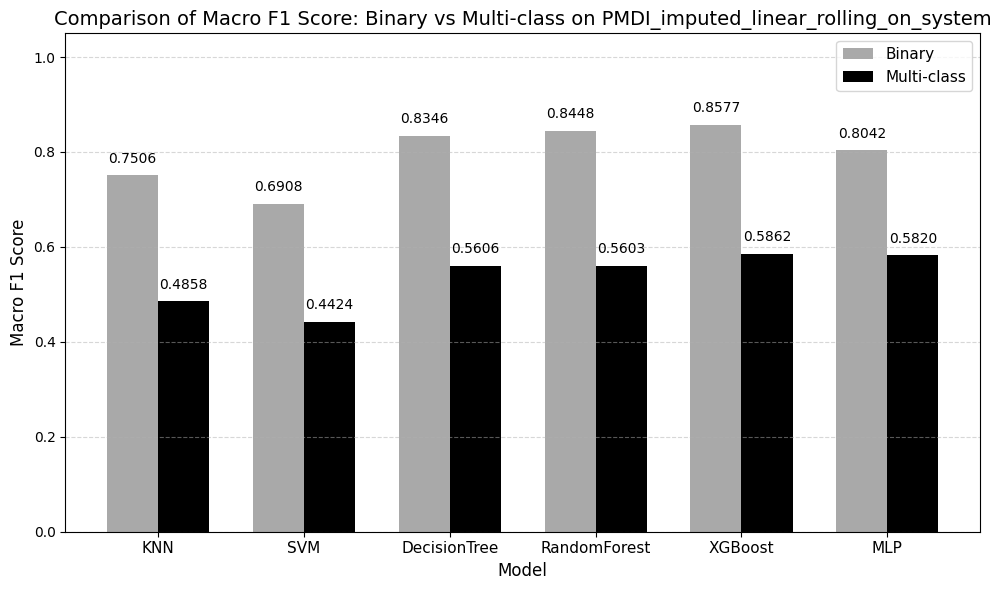

===== 處理 PMDI_imputed_linear_median_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:20<00:00,  3.37s/it]


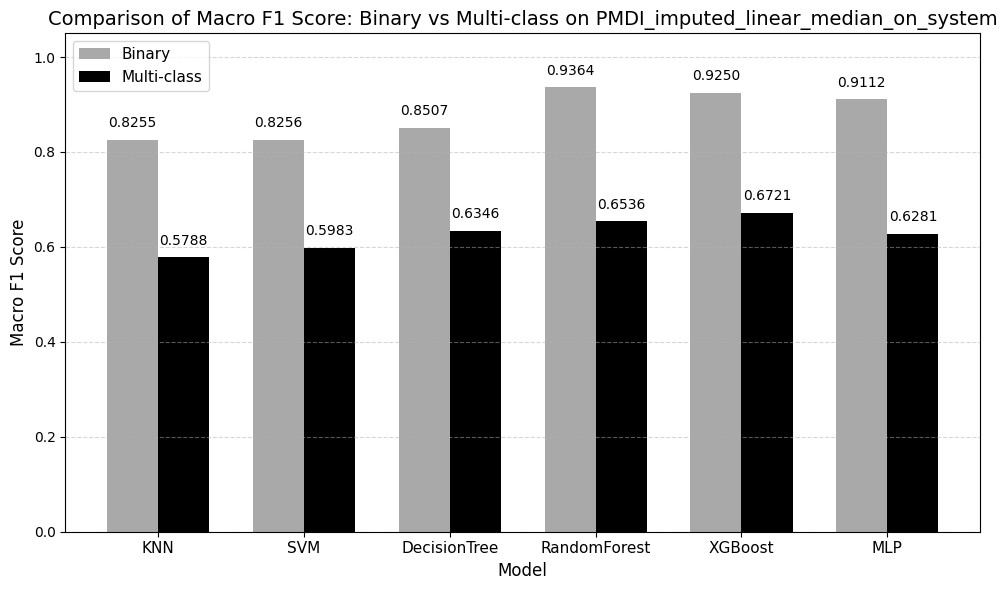

===== 處理 PMDI_imputed_ffill_rolling_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]


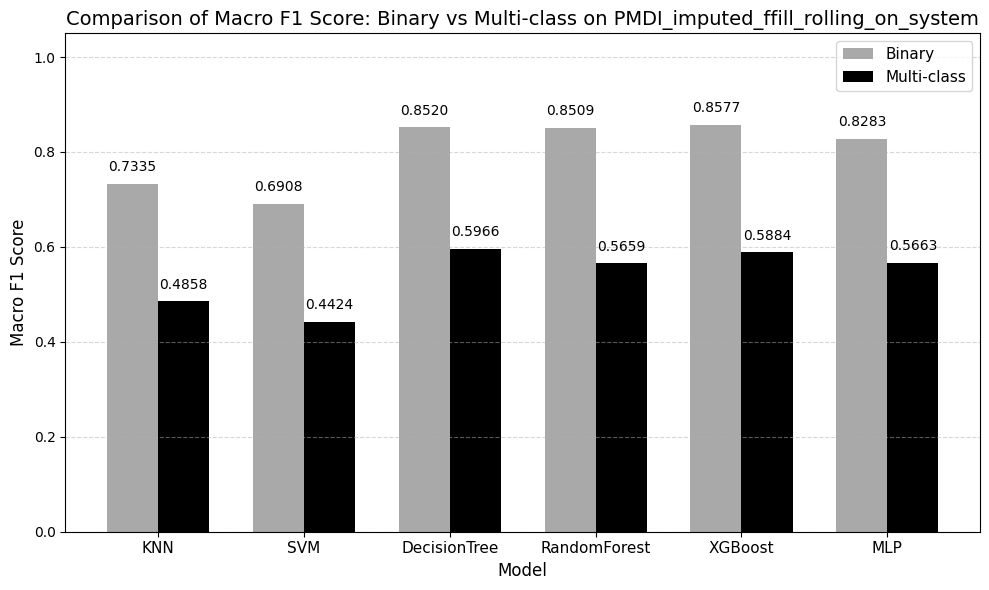

===== 處理 PMDI_imputed_ffill_mean_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:17<00:00,  2.91s/it]


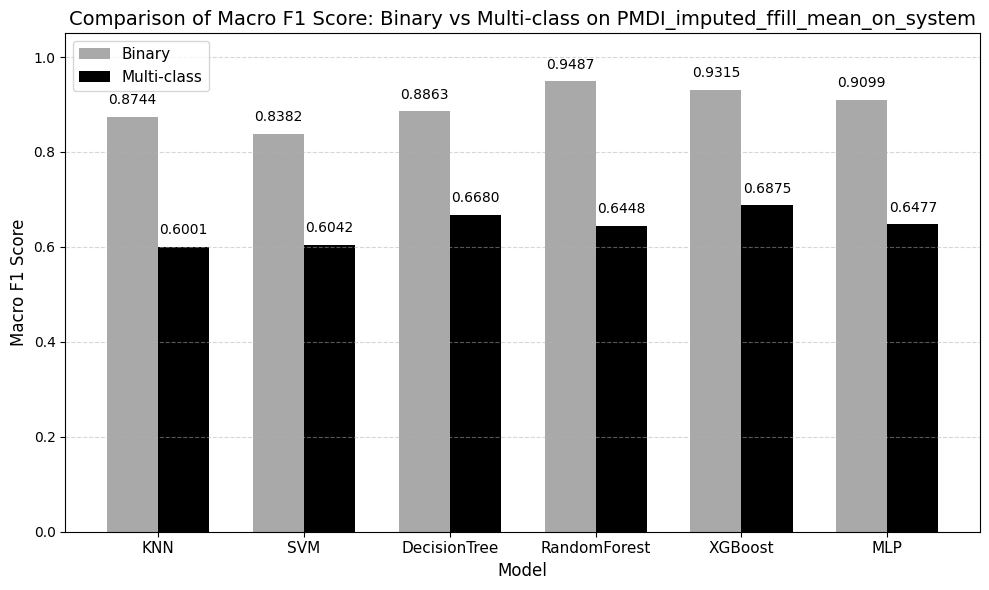

===== 處理 PMDI_imputed_ffill_median_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.27s/it]


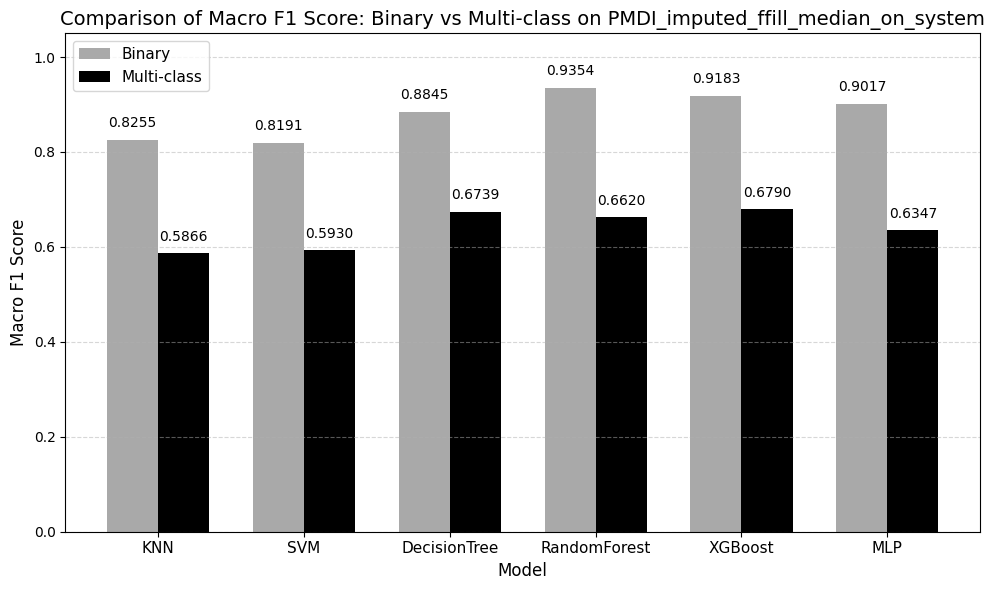

===== 處理 PMDI_imputed_ffill_knn_on_system =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.20s/it]


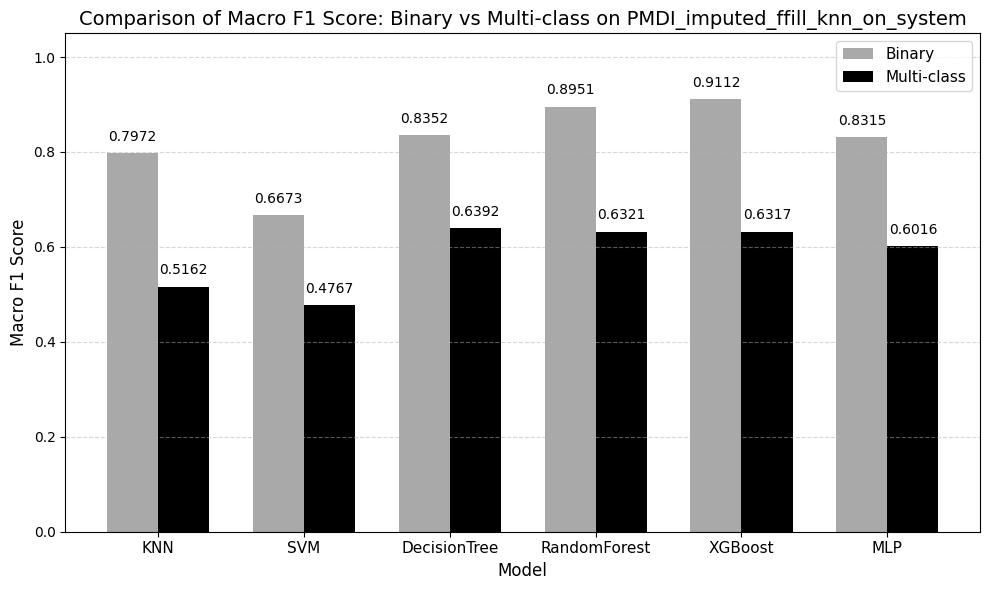

In [3]:
all_results_bin = {}
all_results_multi = {}
np.seterr(all='ignore')

for fname in instance_files:
    print(f'===== 處理 {fname} =====')
    df = load_instance(instance_files[fname])
    df_processed = preprocess(df)
    (X_train_bin, X_test_bin, y_train_bin, y_test_bin,
     X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)
    with suppress_warnings():
        # Binary
        results_bin = evaluate(X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')
        # Multi-class
        results_multi = evaluate(X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')
    all_results_bin[fname] = results_bin['F1']
    all_results_multi[fname] = results_multi['F1']
    # 可選：每個 instance 畫一次 F1 比較圖
    plot_f1_comparison(results_bin, results_multi, fname)

In [4]:
# 彙總所有 instance 的 F1 分數
summary_bin = pd.DataFrame(all_results_bin)
summary_multi = pd.DataFrame(all_results_multi)

print('===== 各 instance 的 Binary F1 分數 =====')
display(summary_bin)
print('===== 各 instance 的 Multi-class F1 分數 =====')
display(summary_multi)

===== 各 instance 的 Binary F1 分數 =====


,PMDI_imputed_rolling_median_on_system,PMDI_imputed_rolling_rolling_on_system,PMDI_imputed_rolling_mean_on_system,PMDI_imputed_rolling_knn_on_system,PMDI_imputed_linear_knn_on_system,PMDI_imputed_linear_mean_on_system,PMDI_imputed_linear_rolling_on_system,PMDI_imputed_linear_median_on_system,PMDI_imputed_ffill_rolling_on_system,PMDI_imputed_ffill_mean_on_system,PMDI_imputed_ffill_median_on_system,PMDI_imputed_ffill_knn_on_system
KNN,0.822417,0.735918,0.865754,0.803692,0.770157,0.852275,0.750596,0.825521,0.733454,0.874415,0.82547,0.797227
SVM,0.81906,0.690767,0.838225,0.667265,0.66513,0.838225,0.690767,0.825566,0.690767,0.838225,0.81906,0.667265
DecisionTree,0.881175,0.843607,0.886259,0.855924,0.837852,0.889083,0.834595,0.850715,0.851962,0.886259,0.884475,0.835178
RandomForest,0.931913,0.853952,0.939923,0.901664,0.891807,0.944345,0.844822,0.936394,0.85086,0.948702,0.935434,0.89515
XGBoost,0.937326,0.857686,0.930508,0.917133,0.915892,0.927172,0.857686,0.925026,0.857686,0.931494,0.918337,0.911222
MLP,0.905032,0.828311,0.909859,0.853952,0.807099,0.909859,0.804203,0.911222,0.828311,0.909859,0.901664,0.831524


===== 各 instance 的 Multi-class F1 分數 =====


,PMDI_imputed_rolling_median_on_system,PMDI_imputed_rolling_rolling_on_system,PMDI_imputed_rolling_mean_on_system,PMDI_imputed_rolling_knn_on_system,PMDI_imputed_linear_knn_on_system,PMDI_imputed_linear_mean_on_system,PMDI_imputed_linear_rolling_on_system,PMDI_imputed_linear_median_on_system,PMDI_imputed_ffill_rolling_on_system,PMDI_imputed_ffill_mean_on_system,PMDI_imputed_ffill_median_on_system,PMDI_imputed_ffill_knn_on_system
KNN,0.577413,0.485767,0.584214,0.524952,0.513803,0.605501,0.485767,0.57875,0.485767,0.600087,0.586587,0.516191
SVM,0.594447,0.442384,0.604235,0.481621,0.465954,0.604235,0.442384,0.598284,0.442384,0.604235,0.592986,0.476664
DecisionTree,0.634376,0.618989,0.665385,0.65164,0.594252,0.657774,0.560627,0.634593,0.596622,0.667995,0.67389,0.639155
RandomForest,0.653623,0.571114,0.644782,0.635832,0.619493,0.644782,0.560292,0.65358,0.565856,0.644782,0.662042,0.632098
XGBoost,0.648588,0.614562,0.675615,0.590505,0.587461,0.668103,0.586152,0.672112,0.588369,0.687541,0.678978,0.631704
MLP,0.665889,0.563054,0.647665,0.604586,0.593588,0.670686,0.582044,0.628084,0.566303,0.647665,0.634677,0.601567


Exception ignored in: <function ResourceTracker.__del__ at 0x1028e5f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105959f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi